In [2]:
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key != min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

def get_data(df, dataset='earnings22', split='test', return_all=False):
    seq_lens = df['seq_len'].unique().tolist()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if not return_all:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            out_data[seq_len] = [el*100 for el in sset['wer'].tolist()]
        if len(sset) != 3:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data

In [3]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [4]:
!ls

augmentation.pdf	     evals_rb_sp2.csv
eval_config_wd.yaml	     evals_rotary_pos_3l.csv
eval.ipynb		     evals_rotary_pos_6l_256d.csv
evals_fourier_pos.csv	     evals_wd.csv
evals_fourier_pos_spec1.csv  model_sizes.pdf
evals_no_rotary.csv	     wer_pos_earnings.pdf
evals_rb.csv		     werr_rb_across_datasets.pdf
evals_rb_sp1.csv


In [5]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [6]:
csv = pd.read_csv('evals_rb_sp2.csv', sep=',')

In [7]:
csv1

NameError: name 'csv1' is not defined

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000]
Sequence length 1024 has 2 results
Sequence length 4096 has 2 results
Sequence length 8192 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 1 results
Sequence length 262144 has 2 results
Sequence length 360000 has 2 results
[2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000, 1024]


/tmp/ipykernel_9375/3014625091.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


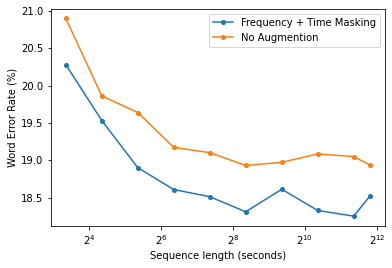

In [9]:
csv1 = pd.read_csv('evals_fourier_pos_spec1.csv', sep=',')
csv2 = pd.read_csv('evals_fourier_pos.csv', sep=',')

dataset = 'earnings22'
split = 'test'
csv1_data = csv1.loc[csv1['dataset'] == dataset ].loc[csv1['split'] == split]
csv2_data = csv2.loc[csv2['dataset'] == dataset ].loc[csv2['split'] == split]
seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

csv1_vals = [csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]
csv2_vals = [csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]

csv1_data_dict = {seq_len: {'wer':csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}
csv2_data_dict = {seq_len: {'wer':csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}

c1 = get_data(csv1, dataset='earnings22', split='test')
c2 = get_data(csv2, dataset='earnings22', split='test')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens], [csv1_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='Frequency + Time Masking', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], [csv2_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='No Augmention', marker='o', markersize=4)
plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word Error Rate (%)')
plt.savefig('augmentation.pdf', bbox_inches='tight')
plt.show()


# csv1_decrease_from2 = {}
# for key in c1:
#     csv1_decrease_from2[key] = (c2[key]['wer'] - c1[key]['wer']) / c2[key]['wer'] * 100

# plt.xscale('log', basex=2)
# plt.plot([el/100 for el in seq_lens], [csv1_decrease_from2[seq_len] for seq_len in seq_lens], label='Frequency + Time Masking', marker='o', markersize=4)


In [10]:
csv1_data_dict

{1024: {'wer': 0.24837121908379792},
 2048: {'wer': 0.23808454002682292},
 4096: {'wer': 0.23526608527527582},
 8192: {'wer': 0.22955428929327584},
 16384: {'wer': 0.22752554650109943},
 32768: {'wer': 0.22679710529719718},
 65536: {'wer': 0.2259052754120458},
 131072: {'wer': 0.22339317443784076},
 262144: {'wer': 0.23145027878193736},
 360000: {'wer': 0.22849907072687542}}

In [11]:
get_data(df=csv3, dataset='earnings22', split='test',  return_all=True)


[2048, 4096, 16384, 32768, 65536, 131072, 262144, 360000]
Sequence length 4096 has 2 results
Sequence length 16384 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 1 results
Sequence length 131072 has 2 results
Sequence length 262144 has 2 results
Sequence length 360000 has 2 results


{2048: [23.55247840205869, 23.66685047893307, 24.38780303494475],
 4096: [23.41564038151257, 23.42789453260625],
 16384: [22.70489961807895, 22.8008904683128],
 32768: [22.772297449094207, 23.10724424565488],
 65536: [22.892796601515432],
 131072: [23.07660886792067, 23.46669934440291],
 262144: [23.48712292955905, 23.090905377529968],
 360000: [23.16851500112329, 23.27063292690399]}

In [12]:
csv1_data_dict

{1024: {'wer': 24.837121908379793, 'std': 0.3199861578799223},
 2048: {'wer': 23.808454002682293, 'std': 0.08475992893392471},
 4096: {'wer': 23.526608527527582, 'std': 0.15017007236228969},
 8192: {'wer': 22.955428929327585, 'std': 0.47976011542341856},
 16384: {'wer': 22.752554650109943, 'std': 0.13204970552701595},
 32768: {'wer': 22.679710529719717, 'std': 0.10761375464003588},
 65536: {'wer': 22.423054142924247, 'std': 0.34016767107571483},
 131072: {'wer': 22.339317443784076, 'std': 0.23940937357770925},
 262144: {'wer': 23.079332012608155, 'std': 0.4664736715355962},
 360000: {'wer': 22.86216122378123, 'std': 0.28875367117083917}}

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[2048, 4096, 16384, 32768, 65536, 131072, 262144, 360000]
Sequence length 4096 has 2 results
Sequence length 16384 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 1 results
Sequence length 131072 has 2 results
Sequence length 262144 has 2 results
Sequence length 360000 has 2 results


/tmp/ipykernel_9375/2579542243.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


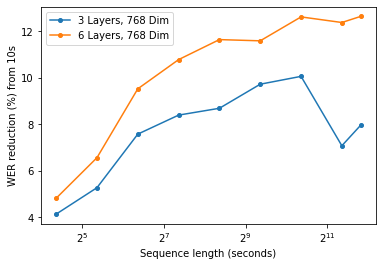

In [10]:
csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')

seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

csv1_data_dict = get_data(df=csv1, dataset='earnings22', split='test')
csv2_data_dict = get_data(df=csv2, dataset='earnings22', split='test')
csv3_data_dict = get_data(df=csv3, dataset='earnings22', split='test')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv1_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='3 Layers, 768 Dim', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv2_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='6 Layers, 768 Dim', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes.pdf', bbox_inches='tight')
plt.show()


In [66]:
csv.loc[csv['dataset'] == 'earnings22'].loc[csv['split'] == 'dev']

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.311783,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,1024,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.306965,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,1024,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.320083,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,1024,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.300701,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,2048,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.297832,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,2048,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.301161,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,2048,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.300438,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,4096,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.294525,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,4096,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.299978,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,4096,0.875,SCConformerXL,-1
9,0,earnings22,dev,0.288458,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,8192,0.875,SCConformerXL,-1


[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]


/tmp/ipykernel_7966/4089147132.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


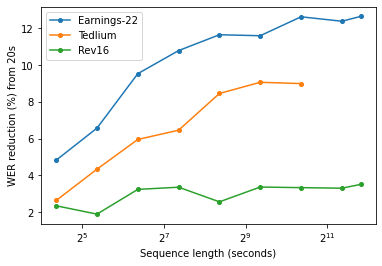

In [25]:
earnings_test = get_data(pd.read_csv('evals_rb.csv', sep=','))
tedlium_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='tedlium')
rev16 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys()) if el<=131072], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys()) if key<=131072], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(rev16).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 20s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

In [61]:
no_pos

{4096: {'wer': 19.720333040595275, 'std': 0.27550147126807834},
 8192: {'wer': 19.47661159106536, 'std': 0.10006167270516933},
 16384: {'wer': 19.286672249113277, 'std': 0.31272326112818755},
 2048: {'wer': 20.557700031996948, 'std': 0.20077883544219124},
 32768: {'wer': 19.091967403958087, 'std': 0.27479400653754593},
 360000: {'wer': 19.20497790848872, 'std': 0.4342514014723085},
 65536: {'wer': 19.000061270755467, 'std': 0.06429375748502734},
 131072: {'wer': 18.922451647162138, 'std': 0.07077884709336803},
 262144: {'wer': 19.456868792081092, 'std': 0.35305245312601996}}

In [140]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [134]:
2**17

131072

In [141]:
!ls

eval_config_wd.yaml	    evals_rb_sp2.csv
eval.ipynb		    evals_rotary_pos_3l.csv
evals_fourier_pos.csv	    evals_wd.csv
evals_fourier_pos_spec1csv  model_sizes.pdf
evals_no_rotary.csv	    wer_pos_earnings.pdf
evals_rb.csv		    werr_rb_across_datasets.pdf
evals_rb_sp1.csv


In [73]:
pd.read_csv('evals_no_rotary.csv', sep=',')

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.257753,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,4096,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.250810,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,4096,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.256110,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,8192,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.250745,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,8192,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.247919,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,8192,0.875,SCConformerXL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,rev16,test,0.147264,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,65536,0.875,SCConformerXL,-1
144,0,rev16,test,0.148939,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,262144,0.875,SCConformerXL,-1
145,0,earnings22,dev,0.275405,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1
146,0,earnings22,test,0.208443,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1


In [24]:
no_pos

{4096: [20.037579396687292, 19.58213344770541, 19.54128627739313],
 8192: [19.52494740926822, 19.36155872801911, 19.54332863590874],
 16384: [19.19408532973878, 19.03069664848967, 19.63523476911137],
 2048: [20.38273798582603, 20.51344893082531, 20.776913179339502],
 32768: [18.84892674060004, 19.036823724036513, 19.39015174723771],
 360000: [18.88160447684986, 19.6985478830954, 19.0347813655209],
 65536: [18.981680044114942, 19.07154381880195, 18.94695994934951],
 131072: [18.84075730653759, 18.9612564589588, 18.96534117599003],
 262144: [19.29416089700386, 19.21450891489492, 19.8619365643445],
 1024: [25.00868002369136, 22.75800093948491]}

In [59]:
get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='dev', return_all=False)

[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]
Sequence length 1024 has 2 results


{4096: {'wer': 25.49642283545043, 'std': 0.36671164412792195},
 8192: {'wer': 25.159147320776754, 'std': 0.4160634246612562},
 16384: {'wer': 24.73791794422543, 'std': 0.3940619570263112},
 2048: {'wer': 26.852095196379032, 'std': 0.22352264478699332},
 32768: {'wer': 24.315958534092562, 'std': 0.3724738361123087},
 360000: {'wer': 24.60286173163965, 'std': 0.473033031795295},
 65536: {'wer': 24.471455686961594, 'std': 0.07927842022233383},
 131072: {'wer': 24.417433201927285, 'std': 0.1578848472423873},
 262144: {'wer': 24.781719959118117, 'std': 0.5701852034552951},
 1024: {'wer': 31.03372755146736, 'std': 1.8088057827987039}}

In [80]:
pd.read_csv('evals_no_rotary.csv', sep=',')

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.257753,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,4096,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.250810,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,4096,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.256110,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,8192,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.250745,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,8192,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.247919,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,8192,0.875,SCConformerXL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,rev16,test,0.147264,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,65536,0.875,SCConformerXL,-1
144,0,rev16,test,0.148939,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,262144,0.875,SCConformerXL,-1
145,0,earnings22,dev,0.275405,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1
146,0,earnings22,test,0.208443,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1


In [76]:
get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test', return_all=True)

[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]


{4096: [20.037579396687292, 19.58213344770541, 19.54128627739313],
 8192: [19.52494740926822, 19.36155872801911, 19.54332863590874],
 16384: [19.19408532973878, 19.03069664848967, 19.63523476911137],
 2048: [20.38273798582603, 20.51344893082531, 20.776913179339502],
 32768: [18.84892674060004, 19.036823724036513, 19.39015174723771],
 360000: [18.88160447684986, 19.6985478830954, 19.0347813655209],
 65536: [18.981680044114942, 19.07154381880195, 18.94695994934951],
 131072: [18.84075730653759, 18.9612564589588, 18.96534117599003],
 262144: [19.29416089700386, 19.21450891489492, 19.8619365643445],
 1024: [25.00868002369136, 22.75800093948491, 20.844311010354748]}

[2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000, 1024]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]


/tmp/ipykernel_9375/3039974584.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


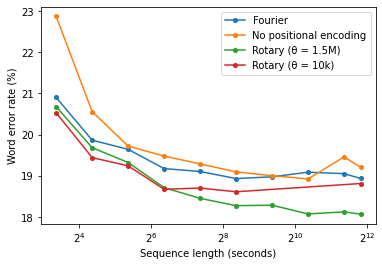

In [13]:
fourier_pos = get_data(pd.read_csv('evals_fourier_pos.csv', sep=','), split='test')
rotary_pos = get_data(pd.read_csv('evals_rb.csv', sep=','), split='test')
no_pos = get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test') # DELETE 1 and 2!!

original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

# log scale
plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(fourier_pos.keys())], [fourier_pos[k]['wer'] for k in sorted(fourier_pos.keys())], label='Fourier', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(no_pos.keys())], [no_pos[k]['wer'] for k in sorted(no_pos.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], original_results_earnings_test, label='Rotary (θ = 10k)', marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend()
plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [9]:
out_data_rb

{}

In [10]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]